In [12]:
# support vector machine using gaussian kernel and PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

data = pd.read_csv('data/svm_gaussian.csv')
data.head()

,x1,x2,y
0,1,2,1
1,2,4,0
2,1,3,1
3,4,1,0
4,2,3,1


In [8]:
# create training data

x1 = np.array(data.iloc[:, 0].values.reshape(-1, 1), dtype=np.float64)
x2 = np.array(data.iloc[:, 1].values.reshape(-1, 1), dtype=np.float64)

# create new features
x3 = x1 * x2
x4 = np.divide(x1, x2, out=np.zeros_like(x1), where=x2!=0)

X = np.concatenate((x1, x2, x3, x4), axis=1)
y = data.iloc[:, 2].values

In [17]:
# reduce dimensionality to 2 using PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [18]:
# train model

svm_gaussian = SVC(kernel='rbf', C=10, gamma=1)
svm_gaussian.fit(X, y)

SVC(C=10, gamma=1)

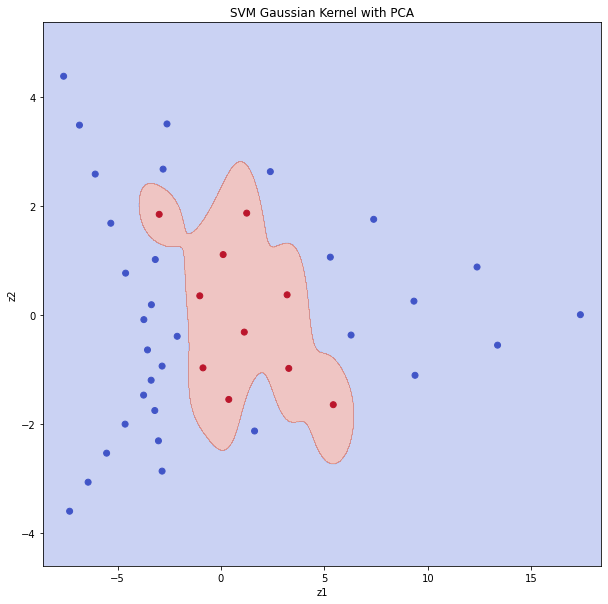

In [23]:
plt.figure(figsize=(10, 10))
plt.title('SVM Gaussian Kernel with PCA')
plt.xlabel('z1')
plt.ylabel('z2')

# plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
Z = svm_gaussian.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')

plt.show()